# Titanic Dataset

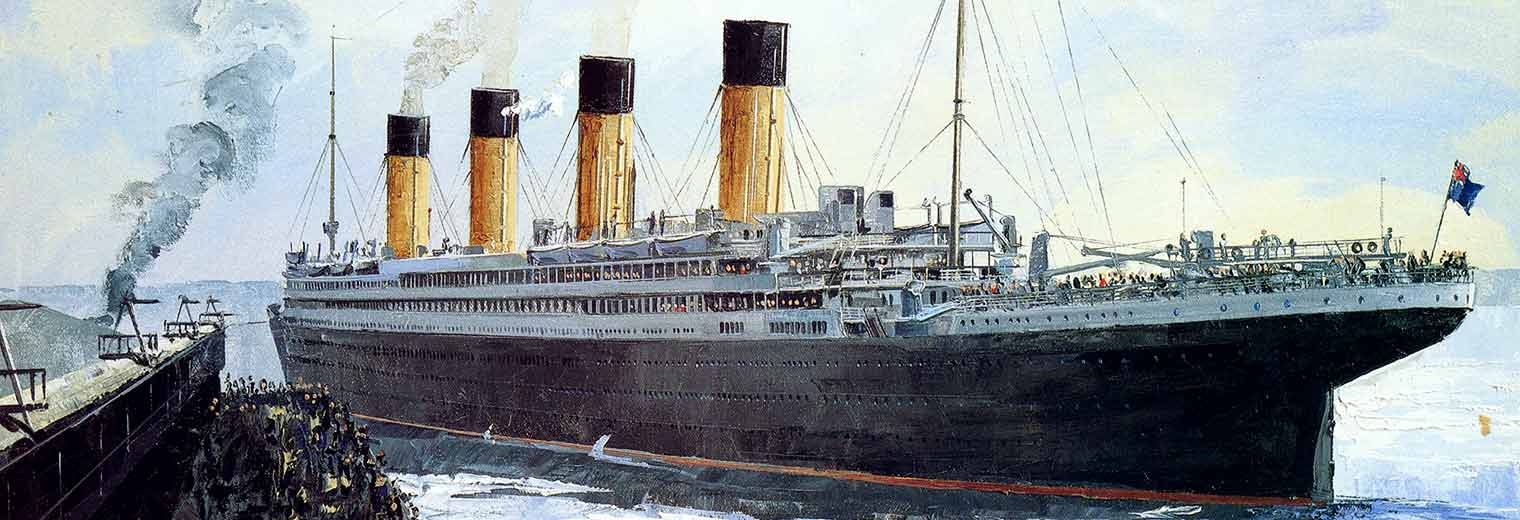

# Workflow 

There are mainly six steps.

1) Problem statement.

2) Acquiring train and test datasets.

3) Clean, prepare and wrangle the Data.

4) Analyze and identify patterns.

5) Model, Predict and solve the problem.

6) Visualize, and report.

# Problam statment

We may also want to develop some early understanding about the domain of our problem. This is described on the Kaggle competition description page here(https://www.kaggle.com/c/titanic). Here are the highlights to note.

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [1]:
# Importing some usefull libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Acquire data

In [2]:
#Here we import data with the help of pandas dataframe

train_df = pd.read_csv('train.csv') 
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyze the feature

- Continous feature: Age, Fare.

- Discrete feature: SibSp, Parch.

- Catagorical feature: Survived, Pclass, Sex, Embarked.

In [4]:
#How many null values we have in our dataset.

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Which features have blsnk or null values?

- approximatly 20% of total record, age is unknown <br>
- approximatly 77.1% of total record, cabin is unknown <br>
- 2 Embarked out of 891 is unknown 

In [5]:
#Using the info command from pandas we can find the detail of columns, data types and non-null values 

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- approximatly 20% of total record, age is unknown in test dataset.<br>
- approximatly 78.2% of total record, cabin is unknown in test dataset.<br>
- 1 record of Fare out of 418 is unknown.

# The intuition of the data that we have

- This helps determine the actual problem.

>- Total samples that we have including train and test datasets is 1309, which is only 58.85% of total people(2224) onboard with passengers and crew.<br>
>- Among all samples that we have in train datasets is 891, only 38.38% people Survived. There are 2224 of the total passengers only 722 passengers(32.46%) survived.<br>
>- Fares varied significantly with few passengers (<1%) paying as high as 512 dollar.<br>
>- Few elderly passengers (<1%) within age range 65-80.
>- There is also a new born baby <6 months age.

In [7]:
#Using the describe command from pandas we can find the statistics of columns that contains numerical values. 

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data_set = pd.concat([train_df, test_df], axis=0)
data_set.shape

(1309, 12)

In [9]:
#Here we can get limit the result to data type Strings.

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# WE can see trand in the traing dataset by ploting histogram

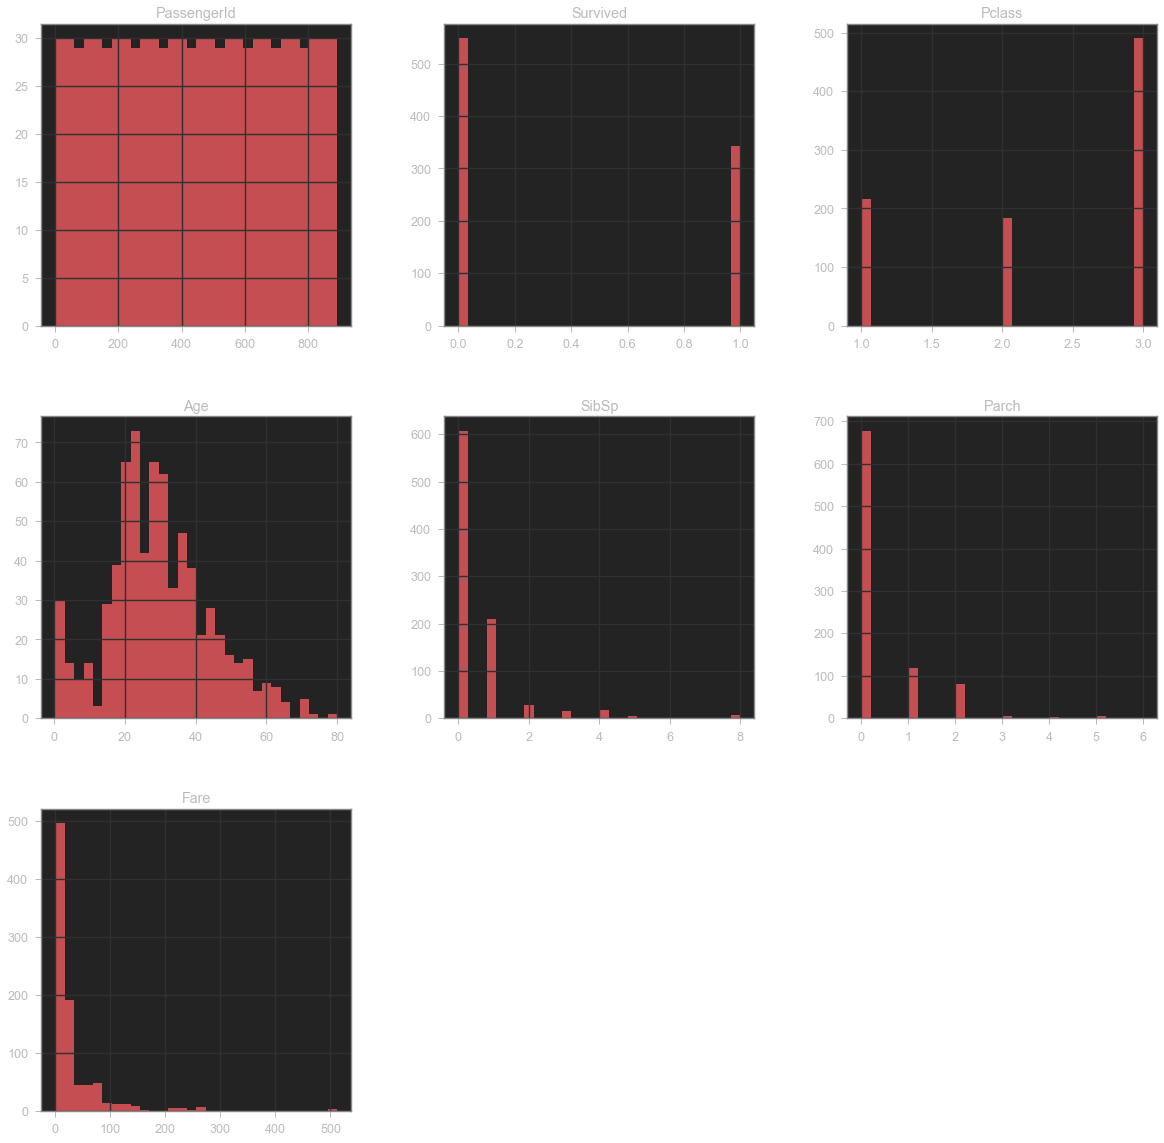

In [10]:
#Import jupyterthemes to get plots in black backgraound.
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
train_df.hist(bins = 30, figsize = (20, 20), color = 'r')
plt.show()

# Exploratory Data Analysis (EDA)

1) Analysis of the features relation with survived feature.

2) Finding any relations or trends considering multiple features.

In [11]:
#Here we use the lambda function as an anonymous function to pass the value and get string values from the cabin column.

train_df['cabin_letter'] = train_df.Cabin.apply(lambda X: str(X)[0])
print(train_df.cabin_letter.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64


# Analyze and identify patterns.

In [12]:
#We can get quickly relations with survived columns by pivoting features against each other.

dfx = pd.pivot_table(train_df, index='Survived', columns='cabin_letter', values = 'Name', aggfunc='count')
dfx

cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


- **cabin** We confirm the observation that most of the people from cabin letter B, C, D, E and 50% of people from cabin letter G are survived. but a passengers from cabin T is not survived. It may happens because A, G and T cabins may be far away from the life boat

,Survived
Sex,
female,0.742038
male,0.188908


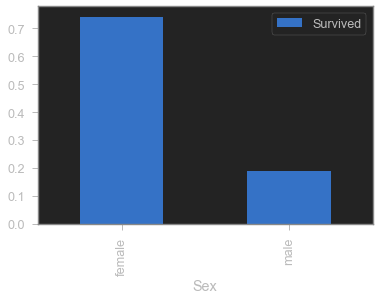

In [13]:
dfsurvived = train_df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)
dfsurvived.plot(kind="bar")
dfsurvived

- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


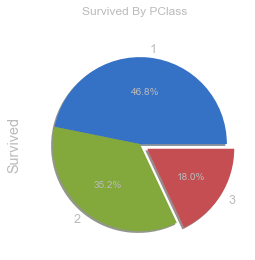

In [14]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.pie(subplots=True,
                                                                                                                 title="Survived By PClass", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

- **Pclass** We can observe that 3rd class passengers had also less chances to survive so probably passengers belonging to upper social social classes were privileged, or simply 3rd class cabins may have been further away of the lifeboats.

In [15]:
train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [16]:
train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [17]:
train_df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [18]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')

referencce https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

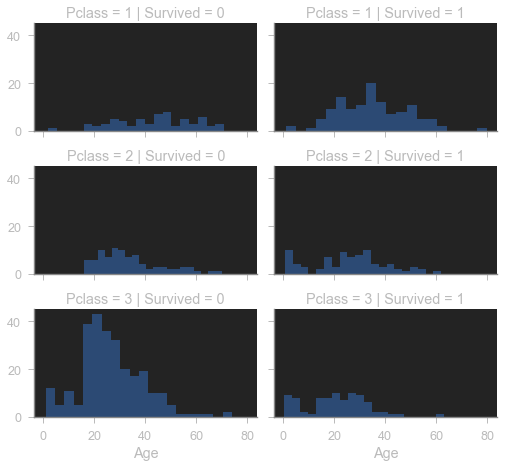

In [19]:
P_class = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
P_class.map(plt.hist, 'Age', alpha=.5, bins=20)
P_class.add_legend();

# Wrangle data 

### Creating new feature extracting from existing like 'title', 'FamilySize' and 'norm_Fare'

> Observations
>- Most titles band Age groups accurately. For example: Miss title has Age mean of 21 years.

In [20]:
#Here we use apply for extracting title from Name column.

data_set['title'] = data_set.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
data_set['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: title, dtype: int64

- Mlle is french word for Ms
- Mme is french word for Mrs

In [21]:
data_set['title'] = data_set['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'the Countess', 'Capt', 'Sir',
                                          'Lady', 'Don', 'Jonkheer','Dona'], 'Unique')
data_set['title'] = data_set['title'].replace('Mlle', 'Miss')
data_set['title'] = data_set['title'].replace('Ms', 'Miss')
data_set['title'] = data_set['title'].replace('Mme', 'Mrs')
data_set['title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Unique     29
Name: title, dtype: int64

In [22]:
data_set[['title', 'Age']].groupby(['title']).mean()

,Age
title,
Master,5.482642
Miss,21.824366
Mr,32.252151
Mrs,36.918129
Unique,45.178571


In [23]:
pd.crosstab(data_set['title'], data_set['Sex'])

Sex,female,male
title,,
Master,0,61
Miss,264,0
Mr,0,757
Mrs,198,0
Unique,4,25


In [24]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### We have collected several assumptions and decisions regarding our datasets. Now We want fill black values in Age. We are using mean average of same group according to title to fill it.

In [25]:
dfx = data_set[['Age','title']].groupby(['title']).mean()
dfx

,Age
title,
Master,5.482642
Miss,21.824366
Mr,32.252151
Mrs,36.918129
Unique,45.178571


- We can use the above statastic to fill null values in the age column.

In [26]:
data_set = pd.merge(data_set, dfx, on='title') #Here merge function of pandas used for merging two table according to title column.
data_set['Age_x'] = data_set['Age_x'].fillna(data_set.pop('Age_y'))
data_set = data_set.sort_values(by='PassengerId', ascending=True).reset_index(drop=True)

In [27]:
data_set['FamilySize'] = data_set['SibSp'] + data_set['Parch'] + 1

In [28]:
data_set['Embarked'] = data_set['Embarked'].fillna('S')

## Converting catagorical variable to numerical.

In [29]:
#Now we can convert features which contain strings to numerical values. This is required by most model algorithms. 
data_set['Sex'] = data_set['Sex'].replace(['male', 'female'], [0, 1])
data_set['Embarked'] = data_set['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
data_set['title'] = data_set['title'].replace(['Master', 'Miss', 'Mr', 'Mrs', 'Unique'], [1,2,3,4,5])

In [30]:
#There is one record in test set with null value.
data_set['Fare'] = data_set['Fare'].fillna(data_set['Fare'].median())

<AxesSubplot:>

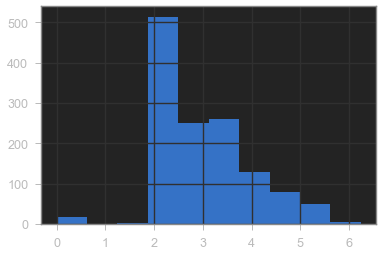

In [31]:
data_set['norm_Fare'] = np.log(data_set.Fare+1)
data_set['norm_Fare'].hist()

In [32]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,FamilySize,norm_Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,3,2,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,4,2,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,4,2,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,3,1,2.202765


In [33]:
train_Data = data_set.loc[:890,:]
test_Data = data_set.loc[890:,:]
print("Shape of new dataframes - {} , {}".format(train_Data.shape, test_Data.shape))

Shape of new dataframes - (891, 15) , (419, 15)


In [34]:
pd.pivot_table(train_Data, index='Survived', columns='title', values = 'Name', aggfunc='count')

title,1,2,3,4,5
Survived,,,,,
0.0,17,55,436,26,15
1.0,23,130,81,100,8


- Here we conclude that class Miss(2), Mrs(4) Survived the most.

In [35]:
train_Data[['title', 'Survived']].groupby(['title'], as_index=False).mean().sort_values(by='Survived', ascending=False).reset_index(drop=True)


,title,Survived
0,4,0.793651
1,2,0.702703
2,1,0.575000
3,5,0.347826
4,3,0.156673


- We can infer some insights about the title. "Misters" seem to have honoured their title and sacrificed themselves in favour on women, childrens and men with more exotic titles like "Master" or "Dr".

In [36]:
train_Data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False).reset_index(drop=True)


,FamilySize,Survived
0,4,0.724138
1,3,0.578431
2,2,0.552795
3,7,0.333333
4,1,0.303538
5,5,0.200000
6,6,0.136364
7,8,0.000000
8,11,0.000000


- We can also note that smaller families had better chances to survive, maybe because bigger families tried to stick together or look for missing members and therefore didn't had places left in the lifeboats. 

In [37]:
train_Data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,FamilySize,norm_Fare
886,887,0.0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.00,NaN,0,5,1,2.639057
887,888,1.0,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.00,B42,0,2,1,3.433987
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.824366,1,2,W./C. 6607,23.45,NaN,0,2,4,3.196630
889,890,1.0,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.00,C148,1,3,1,3.433987
890,891,0.0,3,"Dooley, Mr. Patrick",0,32.000000,0,0,370376,7.75,NaN,2,3,1,2.169054


In [38]:
test_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,FamilySize,norm_Fare
890,891,0.0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.7500,NaN,2,3,1,2.169054
891,892,NaN,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,3,1,2.178064
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,4,2,2.079442
893,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,3,1,2.369075
894,895,NaN,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,3,1,2.268252


In [39]:
train_Data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age_x', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'FamilySize',
       'norm_Fare'],
      dtype='object')

In [40]:
test_Data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age_x', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'FamilySize',
       'norm_Fare'],
      dtype='object')

### Drop features 

- This is a good starting goal to execute. By dropping features we are dealing with fewer data points.
- Based on our assumptions and decisions we want to drop the PassengerID, Name, Cabin and Ticket features.

1) We use the simple model by using simple_data_train_model dataset without using any additional features. 

In [41]:
train_target_df = train_Data['Survived']
train_target_df.shape

(891,)

In [42]:
simple_data_train_model = train_Data[['Pclass', 'Sex', 'Age_x', 'SibSp', 'Parch', 'Fare', 'Embarked']]
simple_data_test_model = test_Data[['Pclass', 'Sex', 'Age_x', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [43]:
Corelation = pd.DataFrame(simple_data_train_model).corr()
Corelation

,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked
Pclass,1.000000,-0.131900,-0.344413,0.083081,0.018443,-0.549500,0.045702
Sex,-0.131900,1.000000,-0.114705,0.114631,0.245489,0.182333,0.116569
Age_x,-0.344413,-0.114705,1.000000,-0.266588,-0.196276,0.091862,-0.016031
SibSp,0.083081,0.114631,-0.266588,1.000000,0.414838,0.159651,-0.059961
Parch,0.018443,0.245489,-0.196276,0.414838,1.000000,0.216225,-0.078665
Fare,-0.549500,0.182333,0.091862,0.159651,0.216225,1.000000,0.062142
Embarked,0.045702,0.116569,-0.016031,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

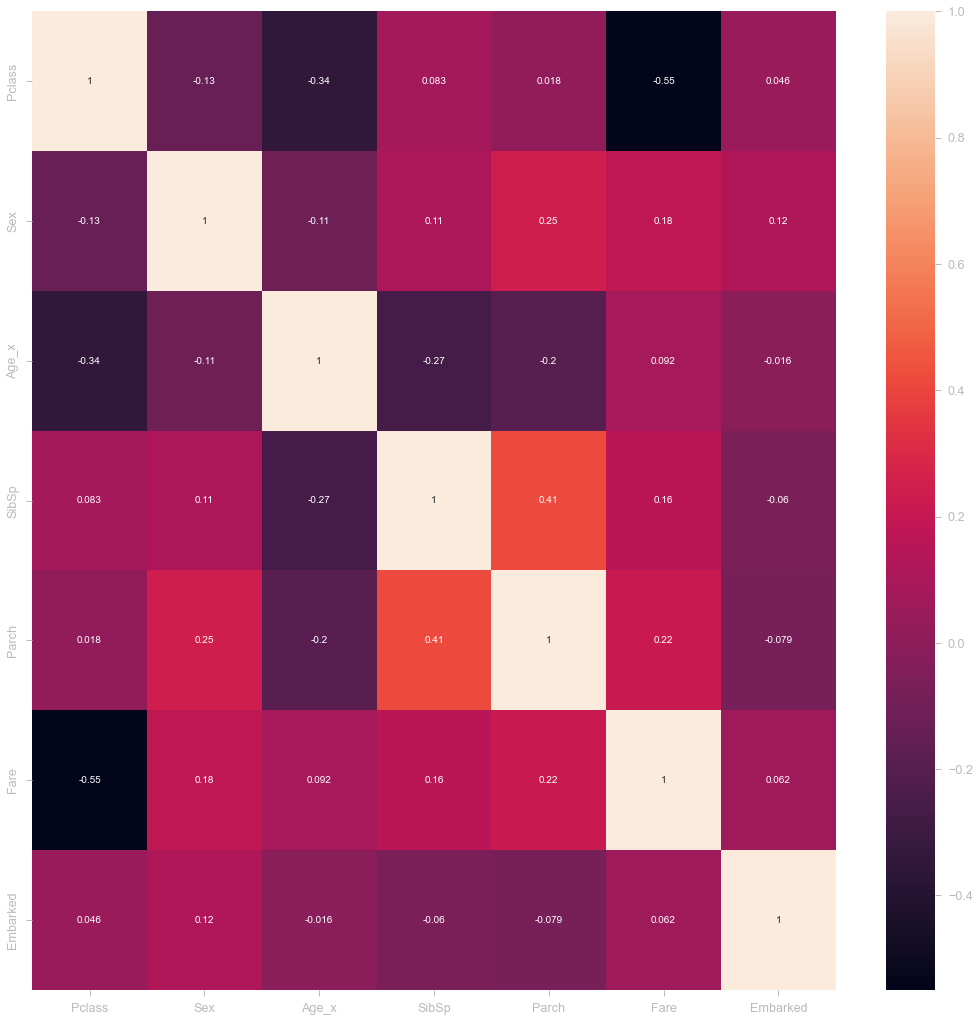

In [44]:
plt.figure(figsize = (18, 18))
sns.heatmap(pd.DataFrame(simple_data_train_model).corr(), annot = True)

In [45]:
simple_data_train_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age_x     891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


# Model, Predict and solve the problem.

The model is now ready to be trained and a prediction can be made. We are also performing supervised learning, which is when our model is trained with labels provided by us. Our goal should be to narrow down the number of models that we can evaluate based on the type of problem and solution requirement. We have a classification and regression problem to solve. We can narrow down our choice of models using these two criteria: Supervised Learning and Classification and Regression. These include:

- Logistic Regression
- Support Vector Machines
- Random Forrest
- k-Nearest Neighbors
- Naive Bayes classifier
- Perceptron
- Decision Tree
- Artificial neural network

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
simple_data_train_model = scaler.fit_transform(simple_data_train_model)
simple_data_test_model = scaler.fit_transform(simple_data_test_model)
simple_data_train_model.shape

(891, 7)

In [47]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

In [48]:
from sklearn.model_selection import train_test_split
X_train_, X_Val_, y_train_, y_Val_ = train_test_split(simple_data_train_model, train_target_df, test_size = 0.2, random_state=42)
X_train_.shape, X_Val_.shape, y_train_.shape, y_Val_.shape

((712, 7), (179, 7), (712,), (179,))

In [49]:
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(X_train_, y_train_)
accuracy_LogisticRegression = round(LogisticRegression_model.score(X_Val_, y_Val_)*100, 2)
# print(accuracy_LogisticRegression)
# print('-'*40)

svm_model = SVC()
svm_model.fit(X_train_, y_train_)
accuracy_svm = round(svm_model.score(X_Val_, y_Val_)*100, 2)
# print(accuracy_svm)
# print('-'*40)


Linear_svm_model = LinearSVC(max_iter=10000)
Linear_svm_model.fit(X_train_, y_train_)
accuracy_Linear_svm = round(Linear_svm_model.score(X_Val_, y_Val_)*100, 2)
# print(accuracy_Linear_svm)
# print('-'*40)


RandomForestClassifier_model = RandomForestClassifier()
RandomForestClassifier_model.fit(X_train_, y_train_)
accuracy_RandomForestClassifier= round(RandomForestClassifier_model.score(X_Val_, y_Val_)*100, 2)
# print(accuracy_RandomForestClassifier)
# print('-'*40)


knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train_, y_train_)
accuracy_knn = round(knn_model.score(X_Val_, y_Val_) * 100, 2)
# print(accuracy_knn)
# print('-'*40)



gaussian_model = GaussianNB()
gaussian_model.fit(X_train_, y_train_)
accuracy_gaussian = round(gaussian_model.score(X_Val_, y_Val_) * 100, 2)
# print(accuracy_gaussian)
# print('-'*40)


perceptron_model = Perceptron()
perceptron_model.fit(X_train_, y_train_)
accuracy_perceptron = round(perceptron_model.score(X_Val_, y_Val_) * 100, 2)
# print(accuracy_perceptron)
# print('-'*40)


decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_, y_train_)
accuracy_decision_tree = round(decision_tree_model.score(X_Val_, y_Val_) * 100, 2)
# print(accuracy_decision_tree)

In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Linear SVC', 'Decision Tree'],
    'Score': [accuracy_svm, accuracy_knn, accuracy_LogisticRegression, 
              accuracy_RandomForestClassifier, accuracy_gaussian, accuracy_perceptron, 
              accuracy_Linear_svm, accuracy_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,82.68
3,Random Forest,82.68
2,Logistic Regression,80.45
7,Decision Tree,80.45
1,KNN,79.89
6,Linear SVC,78.77
5,Perceptron,78.21
4,Naive Bayes,77.09


In [51]:
y_pred = svm_model.predict(simple_data_test_model).astype(int)
# y_pred

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [53]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    },
    'knn_model': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [1,3,5,7,9]
        }
    },
    'svm_model': {
        'model': SVC(),
        'params': {
            'svc__C': [0.1, 1, 10, 100, 1000],
            'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'svc__kernel': ['rbf']
        }
    }
}

In [54]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(simple_data_train_model, train_target_df)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_*100,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,80.808487,{'randomforestclassifier__n_estimators': 10}
1,logistic_regression,79.573159,{'logisticregression__C': 5}
2,knn_model,81.256042,{'kneighborsclassifier__n_neighbors': 9}
3,svm_model,83.050028,"{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kern..."


In [55]:
new_data_train_model = train_Data[['Pclass', 'Sex', 'Age_x', 'SibSp', 'Parch', 'norm_Fare', 'Embarked', 'title', 'FamilySize']]
new_data_test_model = test_Data[['Pclass', 'Sex', 'Age_x', 'SibSp', 'Parch', 'norm_Fare', 'Embarked', 'title', 'FamilySize']]

In [56]:
new_data_train_model = scaler.fit_transform(new_data_train_model)
new_data_train_model.shape

(891, 9)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_Val, y_train, y_Val = train_test_split(new_data_train_model, train_target_df, test_size = 0.2, random_state=42)
X_train.shape, X_Val.shape, y_train.shape, y_Val.shape

((712, 9), (179, 9), (712,), (179,))

In [58]:
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(X_train, y_train)
accuracy_LogisticRegression = round(LogisticRegression_model.score(X_Val, y_Val)*100, 2)
# accuracy_LogisticRegression

svm_model = SVC()
svm_model.fit(X_train, y_train)
accuracy_svm = round(svm_model.score(X_Val, y_Val)*100, 2)
# accuracy_svm

Linear_svm_model = LinearSVC(max_iter= 10000)
Linear_svm_model.fit(X_train, y_train)
accuracy_Linear_svm = round(Linear_svm_model.score(X_Val, y_Val)*100, 2)
# accuracy_Linear_svm

RandomForestClassifier_model = RandomForestClassifier()
RandomForestClassifier_model.fit(X_train, y_train)
accuracy_RandomForestClassifier= round(RandomForestClassifier_model.score(X_Val, y_Val)*100, 2)
# accuracy_RandomForestClassifier

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
accuracy_knn = round(knn_model.score(X_Val, y_Val) * 100, 2)
# accuracy_knn

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
accuracy_knn = round(knn_model.score(X_Val, y_Val) * 100, 2)
# accuracy_knn

gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)
accuracy_gaussian = round(gaussian_model.score(X_Val, y_Val) * 100, 2)
# accuracy_gaussian

perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
accuracy_perceptron = round(perceptron_model.score(X_Val, y_Val) * 100, 2)
# accuracy_perceptron


decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
accuracy_decision_tree = round(decision_tree_model.score(X_Val, y_Val) * 100, 2)
# accuracy_decision_tree

In [59]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron','Linear SVC', 
              'Decision Tree'],
    'Score': [accuracy_svm, accuracy_knn, accuracy_LogisticRegression, 
              accuracy_RandomForestClassifier, accuracy_gaussian, accuracy_perceptron, 
             accuracy_Linear_svm, accuracy_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,82.12
0,Support Vector Machines,81.56
1,KNN,81.01
7,Decision Tree,81.01
2,Logistic Regression,79.89
6,Linear SVC,79.33
5,Perceptron,78.21
4,Naive Bayes,75.98


In [60]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,random_forest,0.804806,{'randomforestclassifier__n_estimators': 10}
1,logistic_regression,0.789264,{'logisticregression__C': 5}
2,knn_model,0.824407,{'kneighborsclassifier__n_neighbors': 9}
3,svm_model,0.834226,"{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel'..."


### Artificial neural network

In [61]:
import tensorflow as tf
from tensorflow import keras

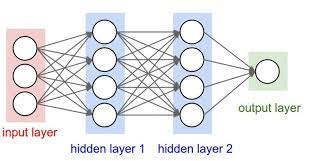

Reference: https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

In [62]:
y_train = tf.one_hot(y_train, depth=2)
y_Val = tf.one_hot(y_Val, depth=2)

In [63]:
model = keras.Sequential([
    keras.layers.Dense(units=9, activation='relu', input_shape=[9]),
    keras.layers.Dense(units=14, activation='relu'),
    keras.layers.Dense(units=21, activation='relu'),
    keras.layers.Dense(units=15, activation='relu'),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=2, activation='sigmoid'),
    
])

In [64]:
model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 14)                140       
                                                                 
 dense_2 (Dense)             (None, 21)                315       
                                                                 
 dense_3 (Dense)             (None, 15)                330       
                                                                 
 dense_4 (Dense)             (None, 8)                 128       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [65]:
history = model.fit(X_train,  y_train,
                    steps_per_epoch = 712,
                    validation_data=(X_Val, y_Val),
                    epochs=11, 
                    validation_steps=179) 

Epoch 1/11


c:\users\sensei infotech\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


712/712 [==============================] - 3s 3ms/step - loss: 0.5759 - accuracy: 0.7107 - val_loss: 0.4948 - val_accuracy: 0.7821
Epoch 2/11
712/712 [==============================] - 2s 3ms/step - loss: 0.4742 - accuracy: 0.7935 - val_loss: 0.4538 - val_accuracy: 0.7989
Epoch 3/11
712/712 [==============================] - 2s 3ms/step - loss: 0.4350 - accuracy: 0.8188 - val_loss: 0.4745 - val_accuracy: 0.8045
Epoch 4/11
712/712 [==============================] - 2s 3ms/step - loss: 0.4180 - accuracy: 0.8272 - val_loss: 0.4148 - val_accuracy: 0.8156
Epoch 5/11
712/712 [==============================] - 2s 3ms/step - loss: 0.4079 - accuracy: 0.8357 - val_loss: 0.4000 - val_accuracy: 0.8212
Epoch 6/11
712/712 [==============================] - 2s 3ms/step - loss: 0.3986 - accuracy: 0.8385 - val_loss: 0.4372 - val_accuracy: 0.8212
Epoch 7/11
712/712 [==============================] - 2s 3ms/step - loss: 0.3917 - accuracy: 0.8357 - val_loss: 0.3949 - val_accuracy: 0.8268
Epoch 8/11
712/71

<AxesSubplot:>

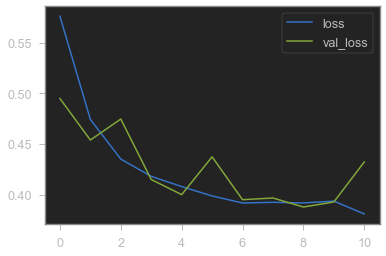

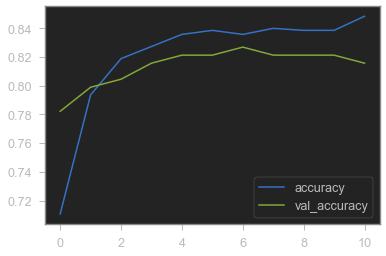

In [66]:
# history stores the loss/accuracy for traing set and Validation set of each epoch.


NN_df = pd.DataFrame(history.history)

# plot it to visualize our model training
NN_df.loc[:,['loss','val_loss']].plot()
NN_df.loc[:, ['accuracy', 'val_accuracy']].plot()